In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder # 결측치가 있으면 에러가 난다...(If there is a missing value, there will be an error)
from scipy.stats import boxcox
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['axes.unicode_minus'] = False

## 1. Read data

In [223]:
data = pd.read_csv('summary_chl_no.csv',encoding="UTF-8-sig")
df = pd.DataFrame(data)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


Temp             pH             EC             Do  \
count  441039.000000  441039.000000  441039.000000  441039.000000   
mean       15.916571       7.701606     259.924324       9.978915   
std         8.038360       0.614969     202.096413       2.443284   
min         0.000000       5.400000      48.000000       0.500000   
25%         8.700000       7.300000     141.000000       8.300000   
50%        16.100000       7.600000     237.000000       9.900000   
75%        22.900000       8.100000     308.000000      11.600000   
max        35.600000      10.400000    3019.000000      29.100000   

                Turb            TOC             TN             TP  
count  441039.000000  441039.000000  441039.000000  441039.000000  
mean        6.137018       2.632900       2.439421       0.025564  
std        13.492158       1.158457       1.306930       0.027087  
min        -0.200000       0.400000       0.101000       0.003000  
25%         1.500000       1.800000       1.476000       0.008000  
50%         3.200000       2.400000       2.282000       0.016000  
75%         6.300000       3.300000       3.215000       0.033000  
max       897.200000      21.000000      10.532000       0.667000

In [224]:
df['EC'] = df['EC'].astype('float')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


## 2. Missing value

In [225]:
df[df==0].count().sum()

414

In [226]:
df.isnull().sum()


Location    0
Temp        0
pH          0
EC          0
Do          0
Turb        0
TOC         0
TN          0
TP          0
dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


In [228]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


<Axes: >

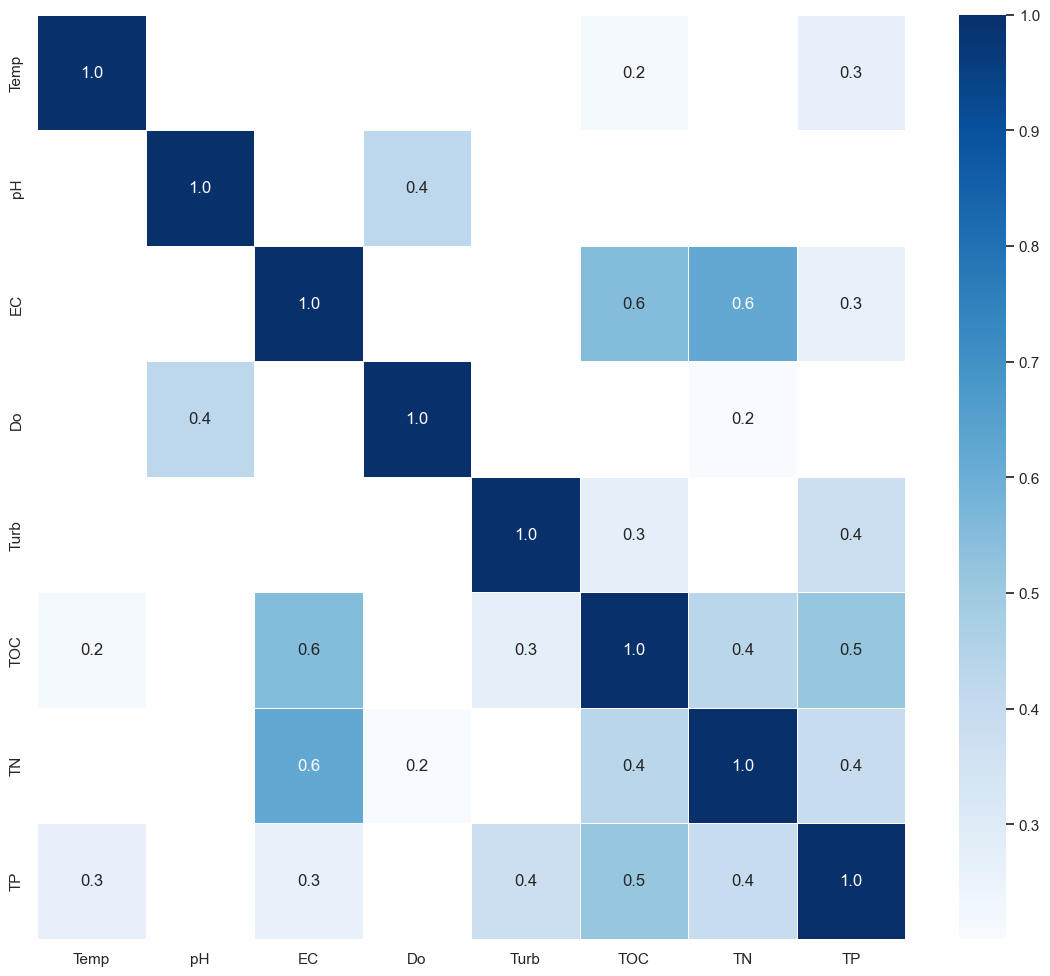

In [229]:
df_temp = df.drop('Location', axis=1)

plt.figure(figsize = (14, 12))
corr = df_temp.corr()
sns.heatmap(corr, annot=True, mask = corr < 0.2, fmt='.1f', linewidths=0.5, cmap='Blues')

## 3. Outlier

### 3.1 Outlier initial data

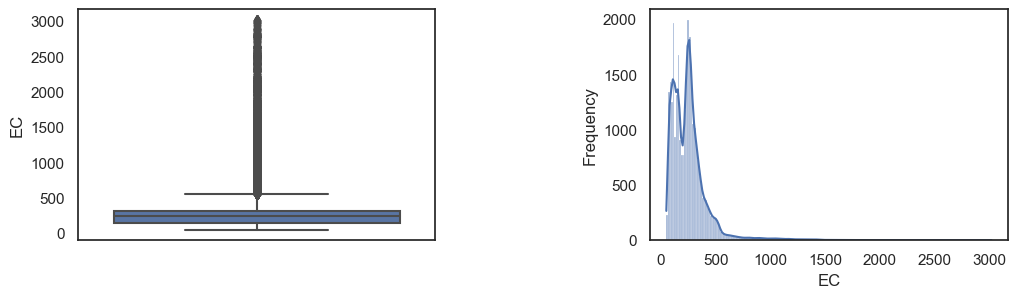

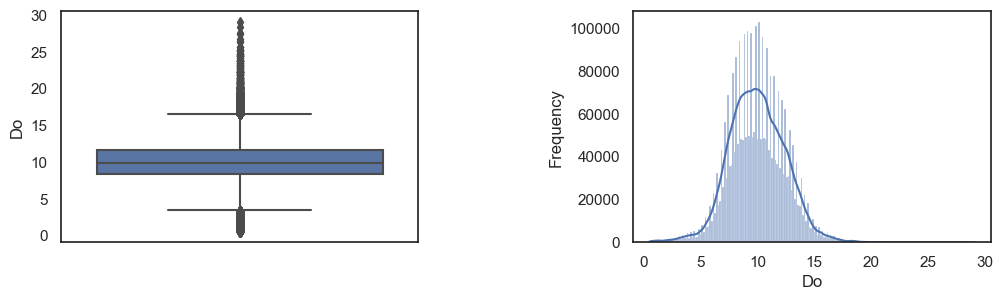

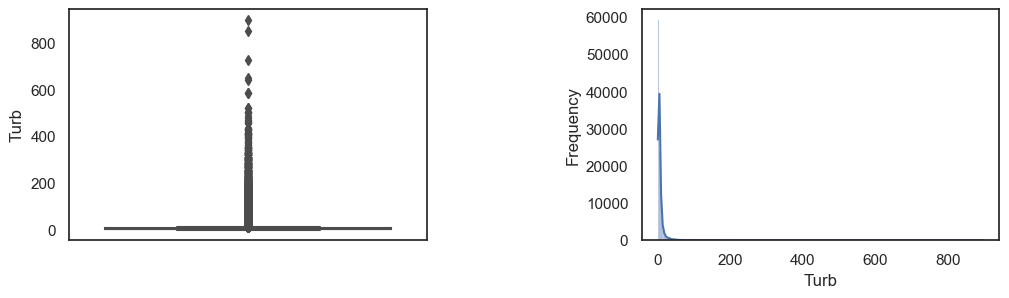

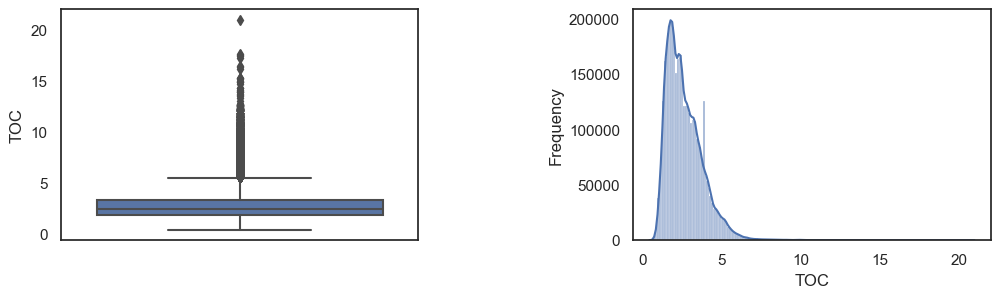

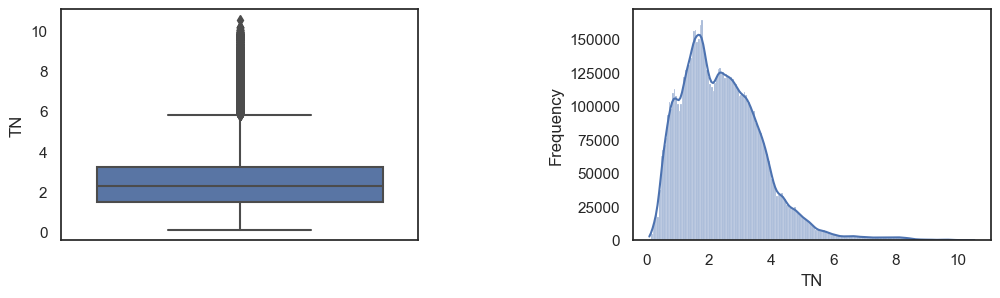

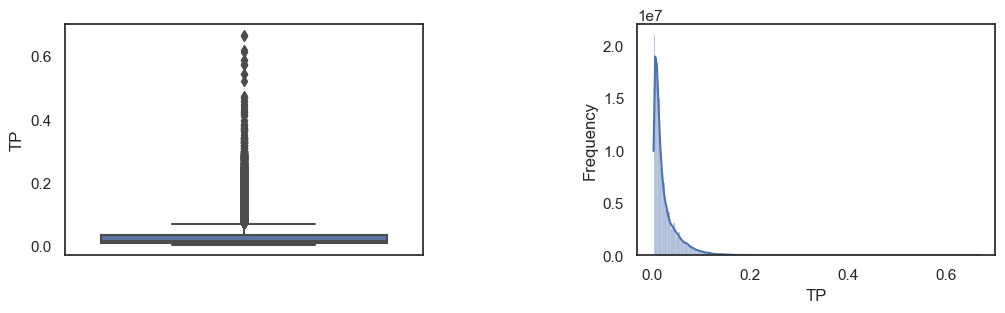

In [230]:
def show_hist_by_target(df, columns):
    sns.set(font_scale = 1.0)
    sns.set_style('white')
    for column in columns:
        fig,  axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
        sns.boxplot(data=df, y=column, ax=axs[0])
        sns.histplot(data=df, x=column, ax=axs[1], kde=True, bins=200, stat='frequency')
        plt.subplots_adjust(hspace=0.8, wspace=0.6)
        
show_hist_by_target(df_temp, df_temp.columns)

### 3.1 Remove the out of data

In [231]:
# q3 = df.quantile(0.75, numeric_only=True) # df['__'].quantile(0.75) 처럼 특정 열만 적용 가능 (Only certain columns can be applied)
# q1 = df.quantile(0.25, numeric_only=True)

# iqr = q3 - q1

# df_temp = df.drop('Location', axis=1) # axis = 0은 행 제거

# print ("0 = : " , df[df == 0].count().sum())
# print ("0 < : " , df_temp[df_temp < 0].count().sum())
# print ("0 > : " , df_temp[df_temp > 0].count().sum())

# s_range = 3
# for k in df.columns:
#     if k != 'Location':
#         out_df = df[(df[k] > q3[k] + s_range* iqr[k]) | (df[k] < q1[k] - s_range * iqr[k])]
#         df = df.drop(out_df.index, axis=0)

# df = df.reset_index(drop=True)

# df_temp = df.drop('Location', axis=1) # axis = 0은 행 제거

# print ("0 = : " , df[df == 0].count().sum())
# print ("0 < : " , df_temp[df_temp < 0].count().sum())
# print ("0 > : " , df_temp[df_temp > 0].count().sum())

# df_temp = df.drop('Location', axis=1) # axis = 0은 행 제거

# def show_hist_by_target(df, columns):
#     sns.set(font_scale=1.0)
#     sns.set_style('white')
#     for column in columns:
#         fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
#         sns.boxplot(data=df, y=column, ax=axs[0])
#         sns.histplot(data=df, x=column, ax=axs[1], kde=True, bins=200, stat='frequency')
#         plt.subplots_adjust(hspace=0.8,wspace=0.6)

# show_hist_by_target(df_temp, df_temp.columns)

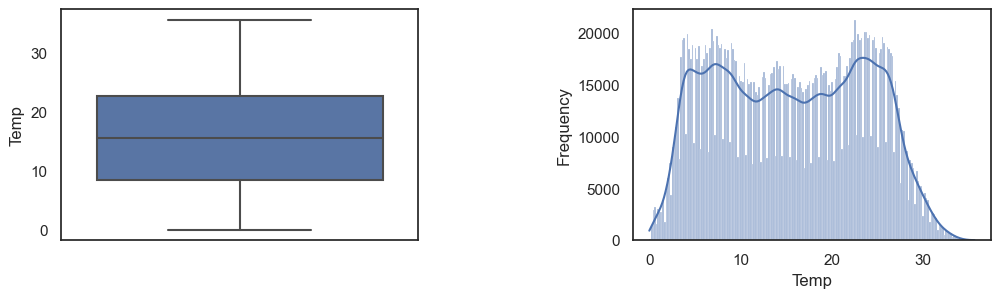

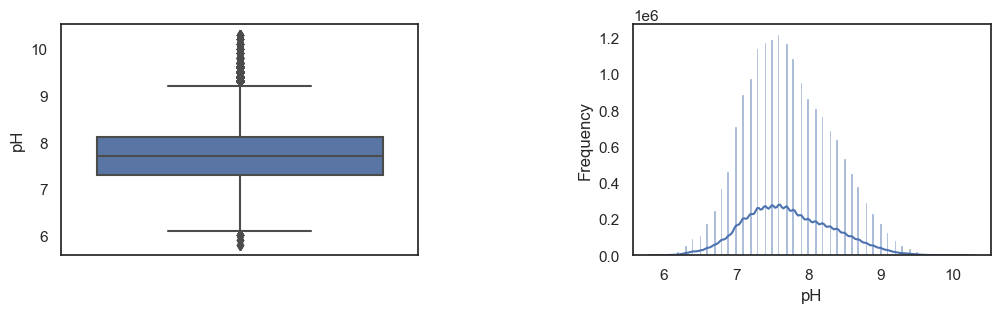

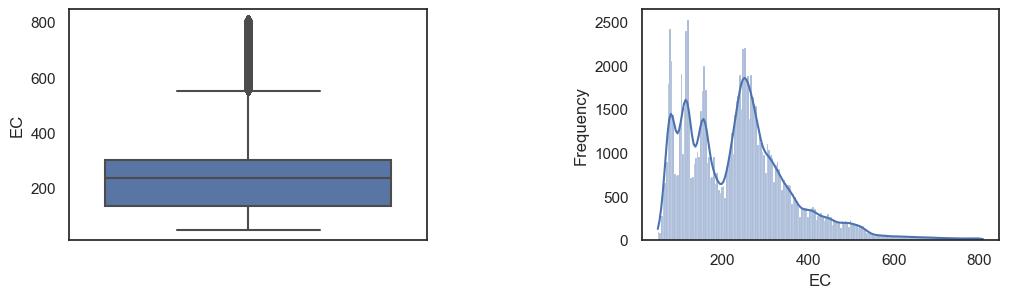

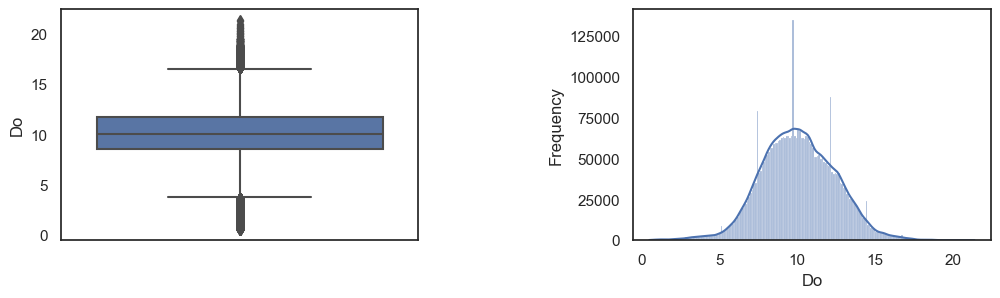

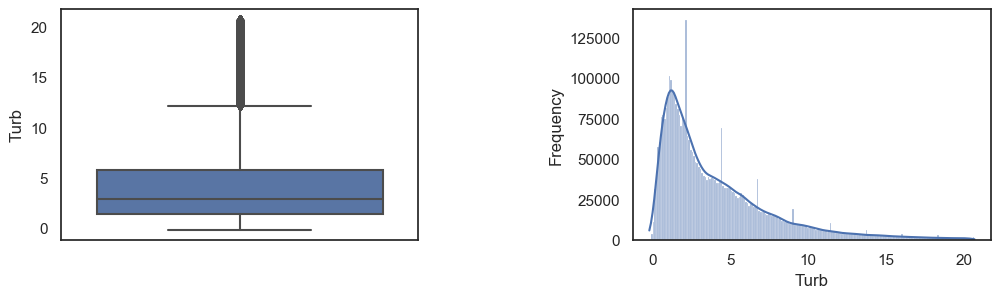

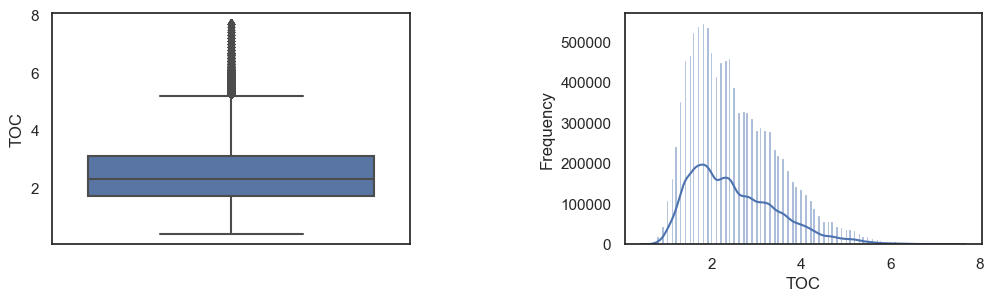

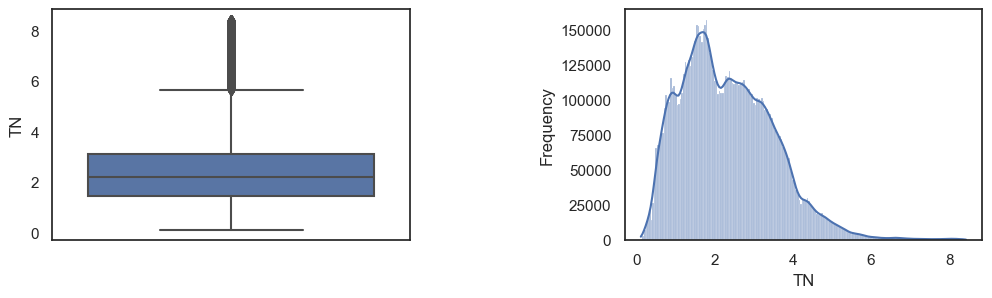

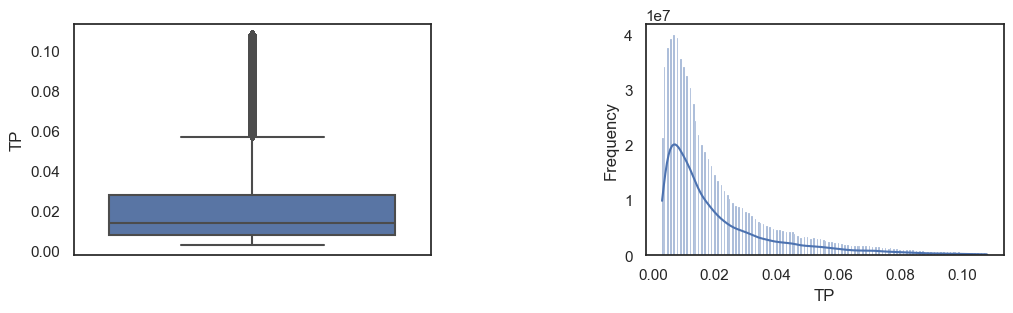

In [232]:
# Calculate quartiles and IQR for numeric columns
q3 = df.quantile(0.75, numeric_only=True)
q1 = df.quantile(0.25, numeric_only=True)
iqr = q3 - q1

# Define the outlier range multiplier (you can adjust this)
s_range = 3

# Loop through columns (excluding 'Location') and remove outliers
for column in df.columns:
    if column != 'Location' and np.issubdtype(df[column].dtype, np.number):
        lower_bound = q1[column] - s_range * iqr[column]
        upper_bound = q3[column] + s_range * iqr[column]
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Define a function to show histograms and box plots
def show_hist_and_box_plots(df, columns):
    sns.set(font_scale=1.0)
    sns.set_style('white')
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
        sns.boxplot(data=df, y=column, ax=axs[0])
        sns.histplot(data=df, x=column, ax=axs[1], kde=True, bins=200, stat='frequency')
        plt.subplots_adjust(hspace=0.8, wspace=0.6)

# Remove the 'Location' column for visualization
df_temp = df.drop('Location', axis=1)

# Show histograms and box plots for the remaining columns
show_hist_and_box_plots(df_temp, df_temp.columns)


In [233]:
# Optionally, you can display statistics about zero values
print("0 = :", (df == 0).sum().sum())
print("0 < :", (df_temp[df_temp < 0]).count().sum())
print("0 > :", (df_temp[df_temp > 0]).count().sum())


0 = : 414
0 < : 8
0 > : 3259938


### 3.3 Optionally for show the pictures

In [234]:
# for k in df.columns:
#     fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
#     plt.rcParams['font.family'] = 'Malgun Gothic'
    
#     if k != 'Location':
#         sns.boxplot(y=k, x="Location", data=df, palette='Set2')

## 4. Standard & Normalizing

- Standard normalizing : 정규분포를 따르는 경우에 표준화하자(Standardize when following a normal distribution).
- Normalizing : 정규분포는 따르지 않는 경우에 정규화하자 (Normalize when normal distribution is not followed).

### 4.1 check data again

In [235]:
df = df.drop('Location', axis=1) # axis = 0은 행 제거

print ("0 = : " , df[df == 0].count().sum())
print ("0 < : " , df[df < 0].count().sum())
print ("0 > : " , df[df > 0].count().sum())

df = df.replace(0, 0.00000000001)

df

0 = :  414
0 < :  8
0 > :  3259938


Temp   pH     EC    Do  Turb  TOC     TN     TP
0       10.2  7.5  541.0   9.8   1.9  4.7  4.822  0.027
1       10.2  7.5  538.0   9.8   1.9  4.6  4.797  0.027
2       10.2  7.5  539.0   9.8   1.9  4.6  4.776  0.027
3       10.1  7.5  540.0   9.7   1.8  4.6  4.753  0.028
4       10.0  7.5  540.0   9.6   1.9  4.7  4.725  0.026
...      ...  ...    ...   ...   ...  ...    ...    ...
407540   2.3  8.4  363.0  13.7   1.4  1.5  3.548  0.015
407541   2.3  8.4  364.0  13.6   1.4  1.5  3.636  0.012
407542   2.3  8.4  364.0  13.7   1.4  1.5  3.665  0.010
407543   2.2  8.4  366.0  13.7   1.4  1.5  3.651  0.009
407544   2.3  8.4  367.0  13.6   1.4  1.5  3.720  0.009

[407545 rows x 8 columns]

### 4.2 Generate a probability plot

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


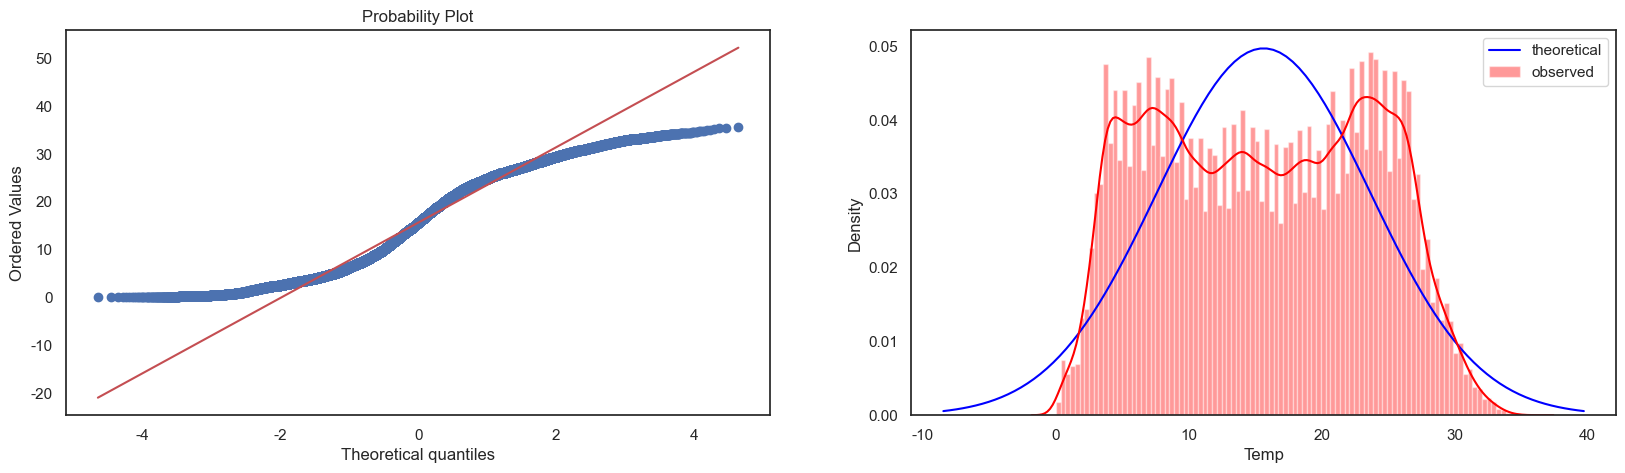

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


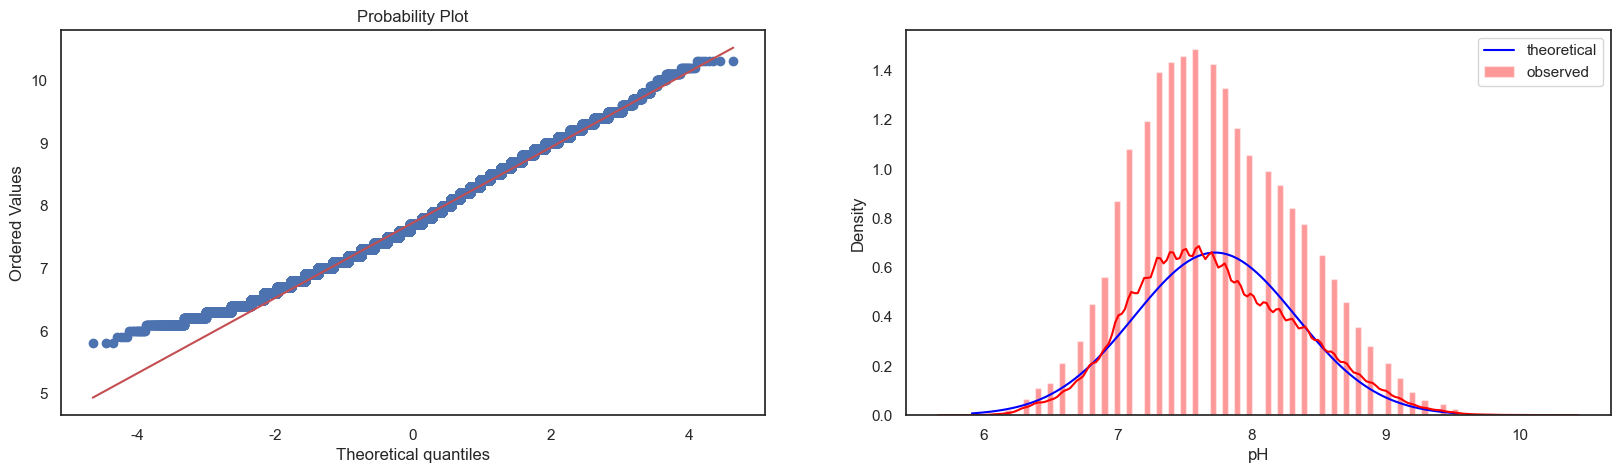

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


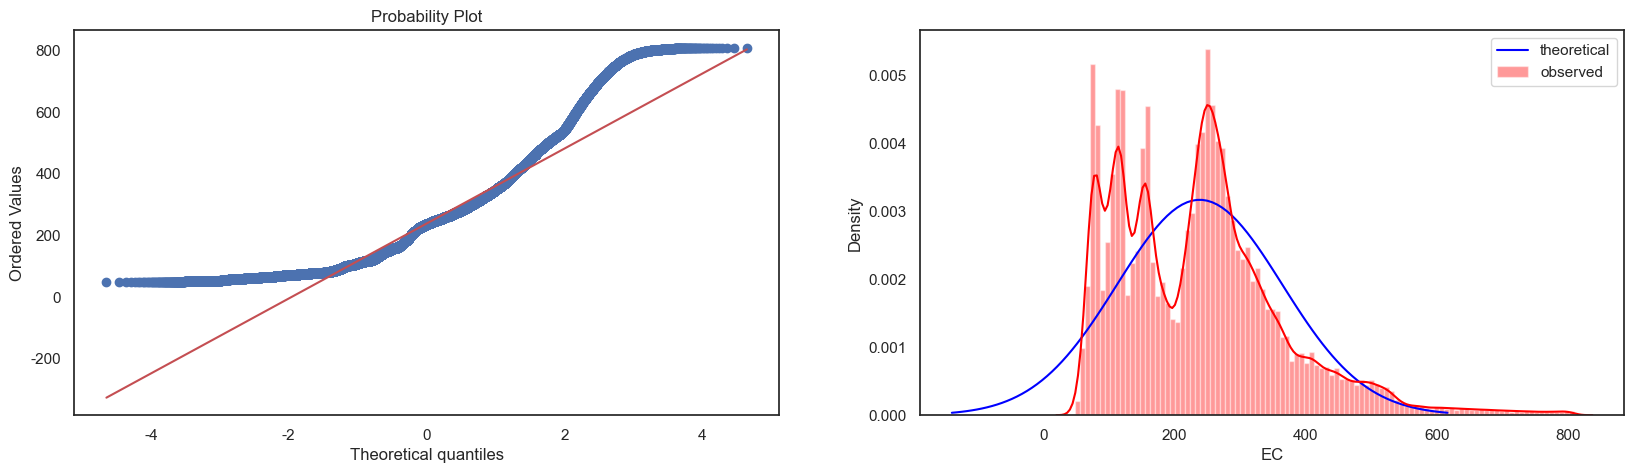

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


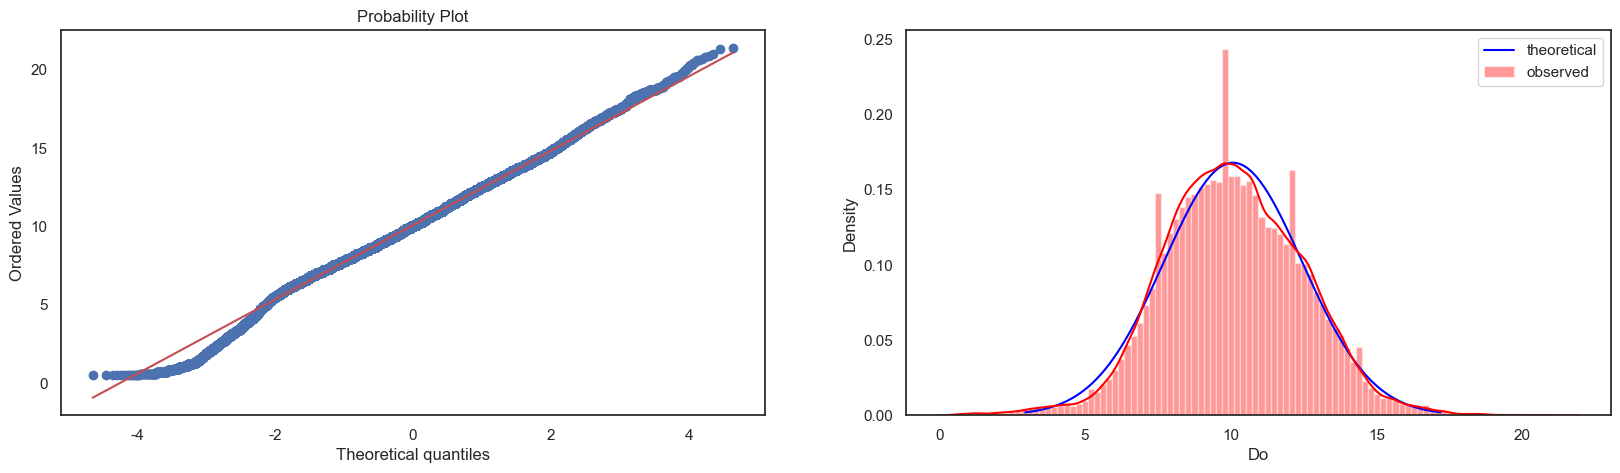

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


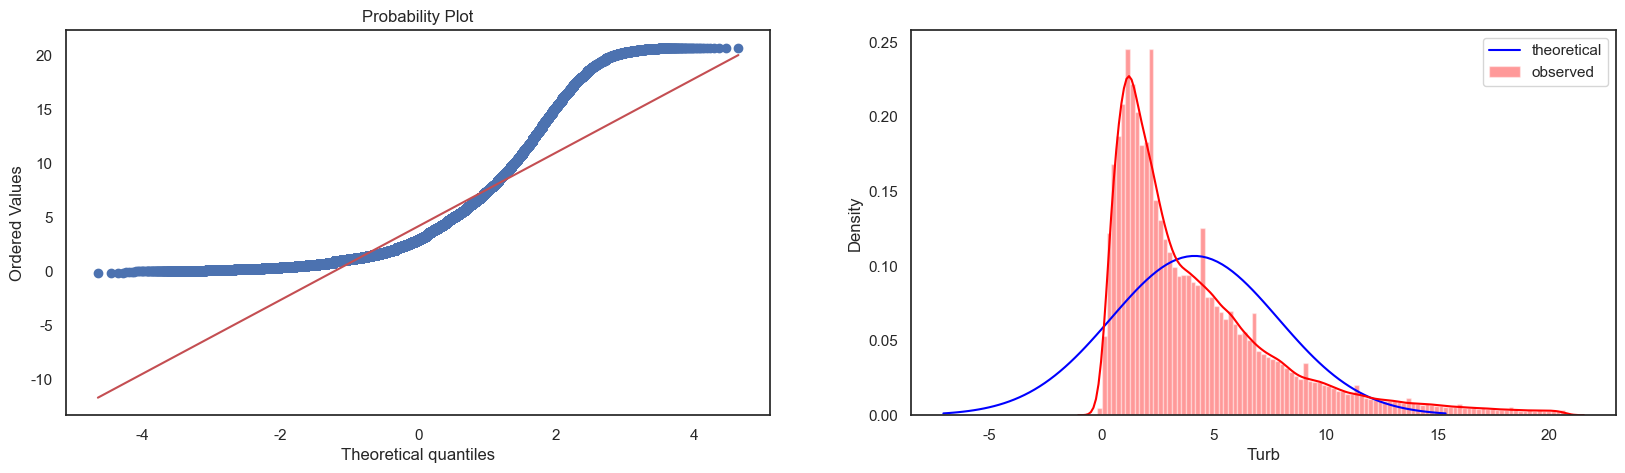

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


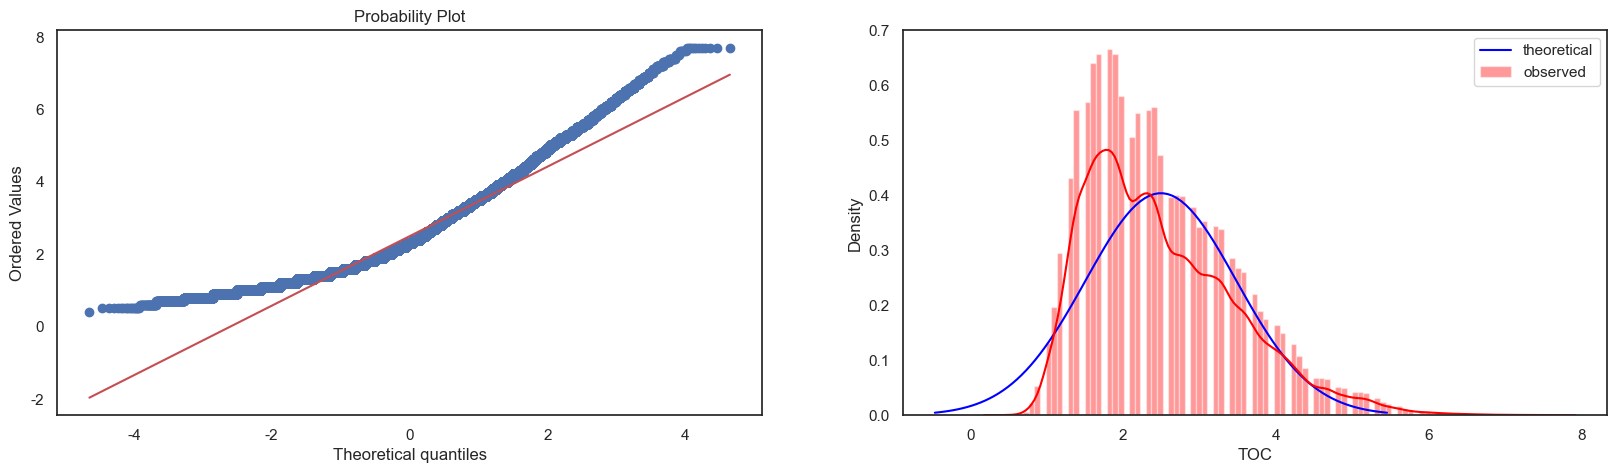

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


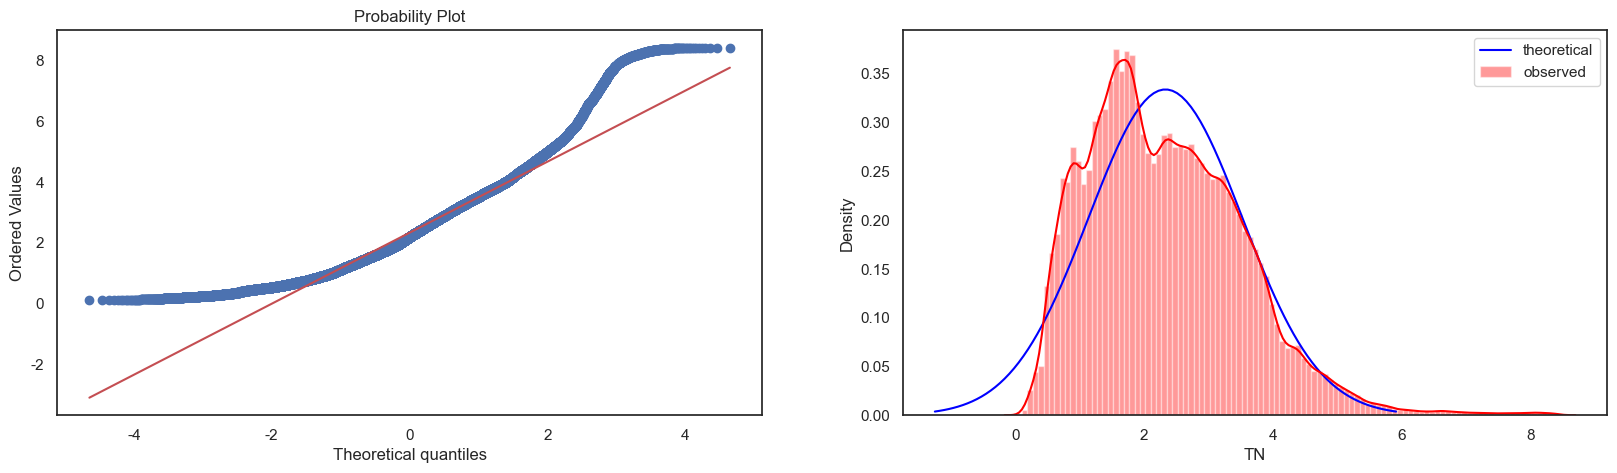

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


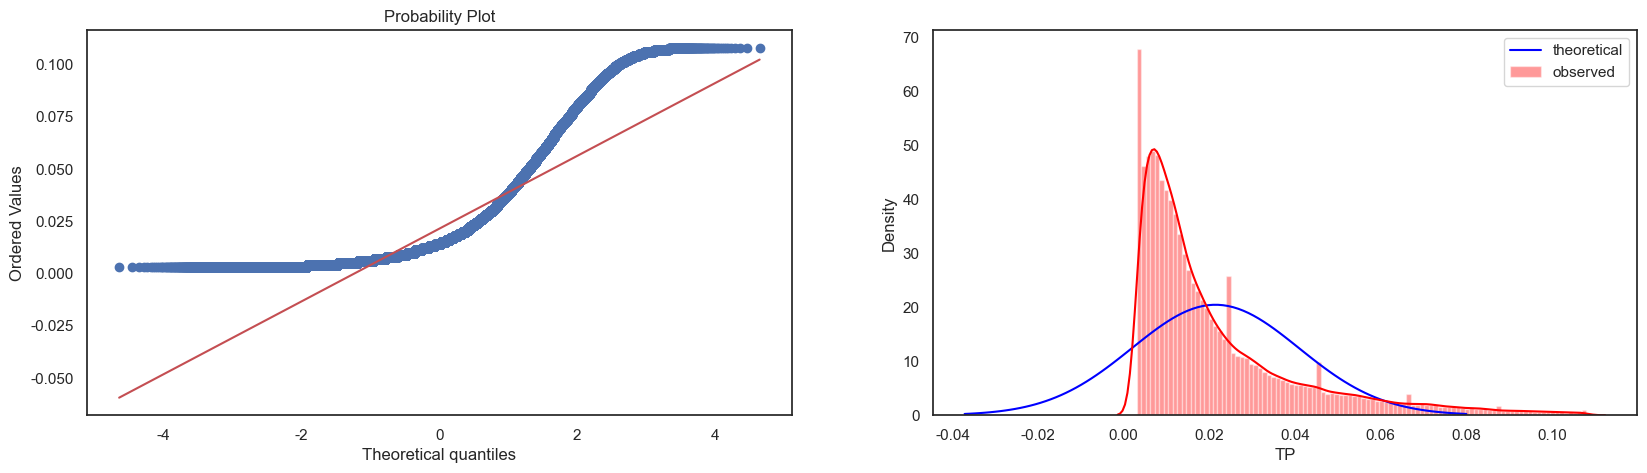

In [236]:
for k in df_temp.columns:
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    stats.probplot(df[k], dist=stats.norm, plot=ax1)

    mu = df[k].mean()
    variance = df[k].var()
    sigma = variance ** 0.5

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

    sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')
    ax2.legend()

    plt.show()

### 4.2  Statistical test with KS(Kolmogorov-Smirnov) and (D'Agostino and Pearson's Normality )


In [237]:
# (Kolmogorov-Smirnov) kstest / shapiro
for k in df.columns:
    test_stat, p_val = stats.kstest(df[k], 'norm')
    print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))
    
# D'Agostino and Pearson's Normality Test 
for k in df.columns:
    test_stat, p_val = stats.normaltest(df[k])
    print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))

Test-statistics : 0.974, p-value : 0.000, skewness : 0.025
Test-statistics : 1.000, p-value : 0.000, skewness : 0.294
Test-statistics : 1.000, p-value : 0.000, skewness : 1.028
Test-statistics : 0.995, p-value : 0.000, skewness : 0.006
Test-statistics : 0.709, p-value : 0.000, skewness : 1.656
Test-statistics : 0.855, p-value : 0.000, skewness : 0.865
Test-statistics : 0.712, p-value : 0.000, skewness : 0.779
Test-statistics : 0.501, p-value : 0.000, skewness : 1.796
Test-statistics : 310029.606, p-value : 0.000, skewness : 0.025
Test-statistics : 6816.994, p-value : 0.000, skewness : 0.294
Test-statistics : 64369.353, p-value : 0.000, skewness : 1.028
Test-statistics : 1283.796, p-value : 0.000, skewness : 0.006
Test-statistics : 123968.229, p-value : 0.000, skewness : 1.656
Test-statistics : 41891.170, p-value : 0.000, skewness : 0.865
Test-statistics : 40530.797, p-value : 0.000, skewness : 0.779
Test-statistics : 136076.520, p-value : 0.000, skewness : 1.796


## 5. Box-Cox

### 5.1 Check data 

In [238]:
print ("0 = : " , df[df == 0].count().sum())
print ("0 < : " , df[df_temp < 0].count().sum())
print ("0 > : " , df[df_temp > 0].count().sum())

df_temp.count()

0 = :  0
0 < :  8
0 > :  3259938


Temp    407545
pH      407545
EC      407545
Do      407545
Turb    407545
TOC     407545
TN      407545
TP      407545
dtype: int64

### 5.2 Box-Cox transformation 


In [239]:
# for k in df.columns:
#     if k != 'Temp' and k != 'Do':
#         df[k], lm = boxcox(df[k])
#         print(k + ": {:.3f}".format(lm))
# # (Kolmogorov-Smirnov) 검정     
# for k in df.columns:
#     test_stat, p_val = stats.kstest(df[k], 'norm')
#     print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))
    
# # D'Agostino and Pearson's
# for k in df.columns:
#     test_stat, p_val = stats.normaltest(df[k])
#     print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))

# for k in df.columns:
#     fig = plt.figure(figsize=(20,5))
#     ax1 = fig.add_subplot(1, 2, 1)
#     ax2 = fig.add_subplot(1, 2, 2)

#     stats.probplot(df[k], dist=stats.norm, plot=ax1)

#     mu = df[k].mean()
#     variance = df[k].var()
#     sigma = variance ** 0.5

#     x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#     ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

#     sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')
#     ax2.legend()

#     plt.show()

Skipping Temp due to column exclusion.
pH: Lambda = -0.482
EC: Lambda = 0.224
Skipping Do due to column exclusion.
Skipping Turb due to non-positive data.
TOC: Lambda = -0.003
TN: Lambda = 0.430
TP: Lambda = -0.100
Temp: Test-statistics = 0.974, p-value = 0.000, skewness = 0.025
pH: Test-statistics = 0.887, p-value = 0.000, skewness = 0.004
EC: Test-statistics = 1.000, p-value = 0.000, skewness = -0.025
Do: Test-statistics = 0.995, p-value = 0.000, skewness = 0.006
Turb: Test-statistics = 0.709, p-value = 0.000, skewness = 1.656
TOC: Test-statistics = 0.552, p-value = 0.000, skewness = 0.000
TN: Test-statistics = 0.399, p-value = 0.000, skewness = -0.033
TP: Test-statistics = 0.994, p-value = 0.000, skewness = 0.020
Temp: Test-statistics = 310029.606, p-value = 0.000, skewness = 0.025
pH: Test-statistics = 2194.707, p-value = 0.000, skewness = 0.004
EC: Test-statistics = 10544.485, p-value = 0.000, skewness = -0.025
Do: Test-statistics = 1283.796, p-value = 0.000, skewness = 0.006
Turb

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


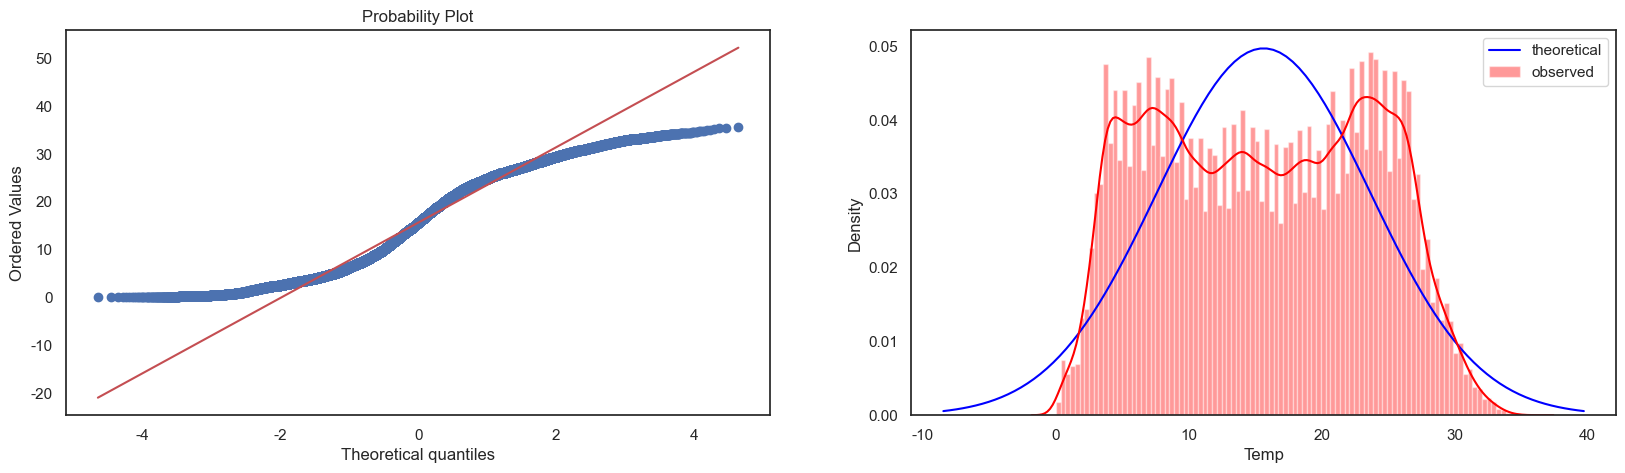

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


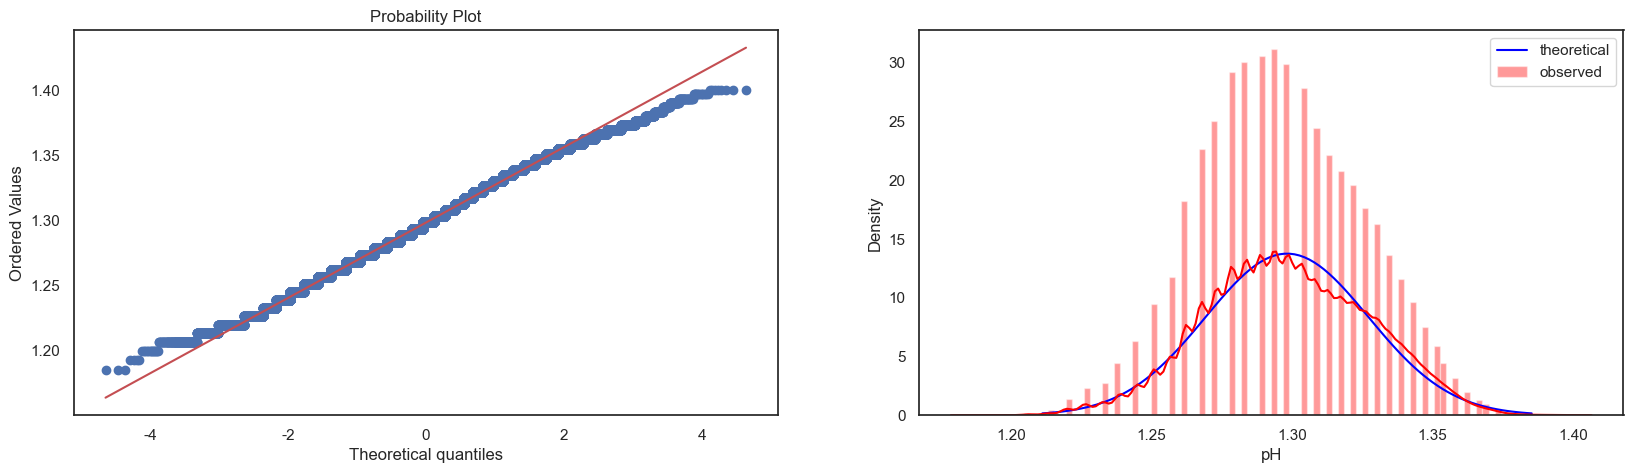

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


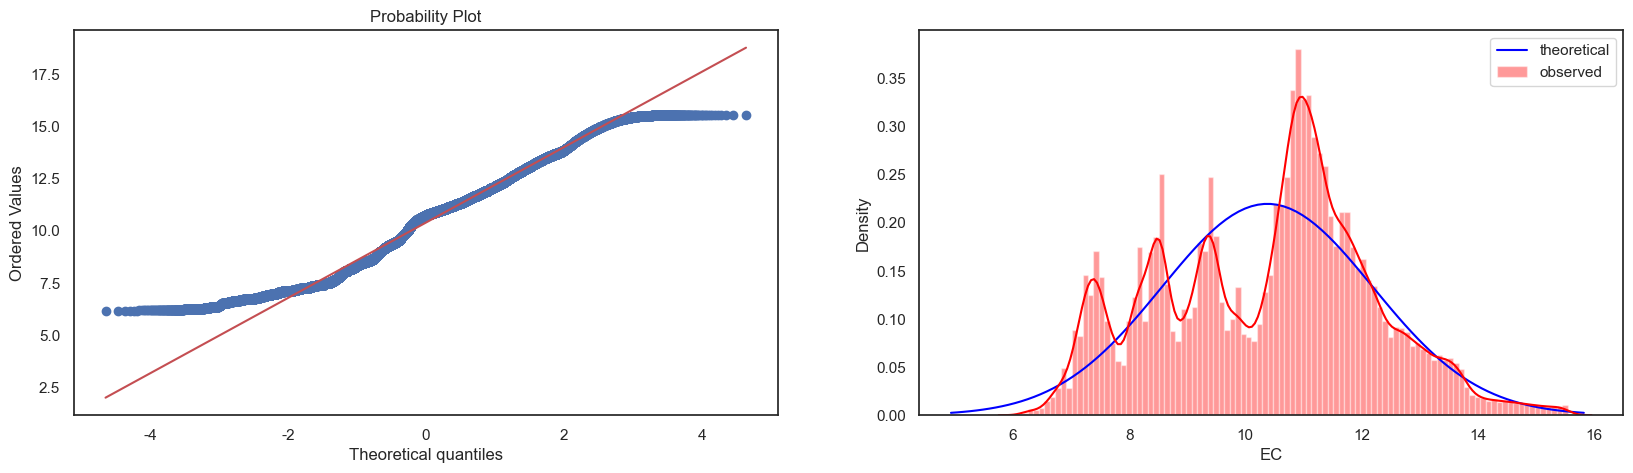

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


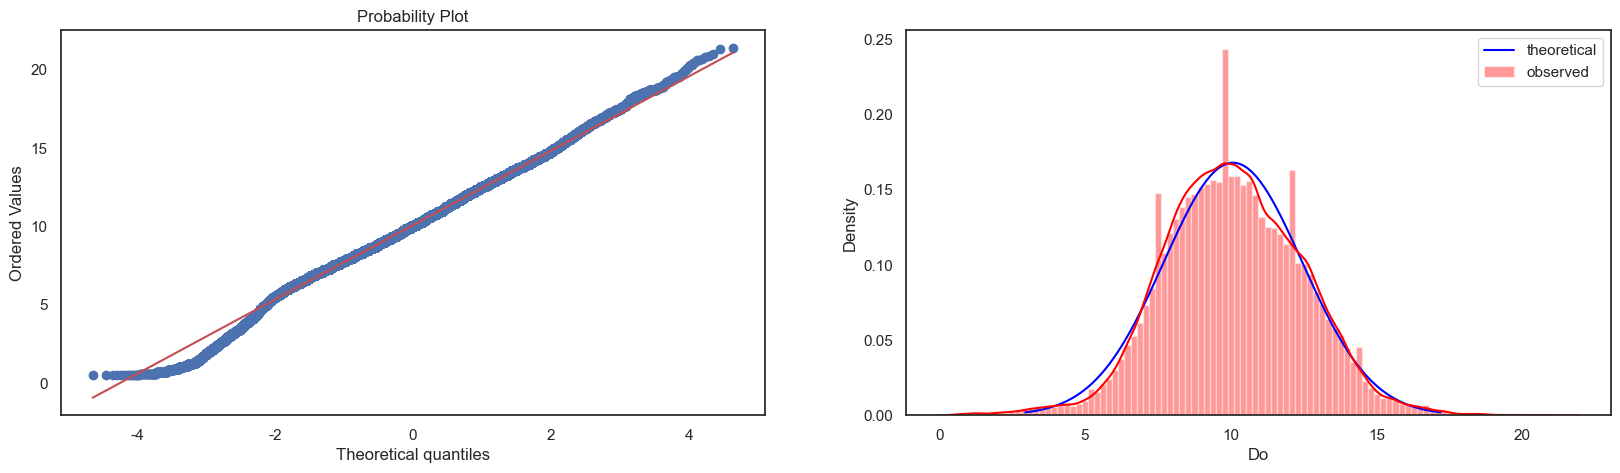

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


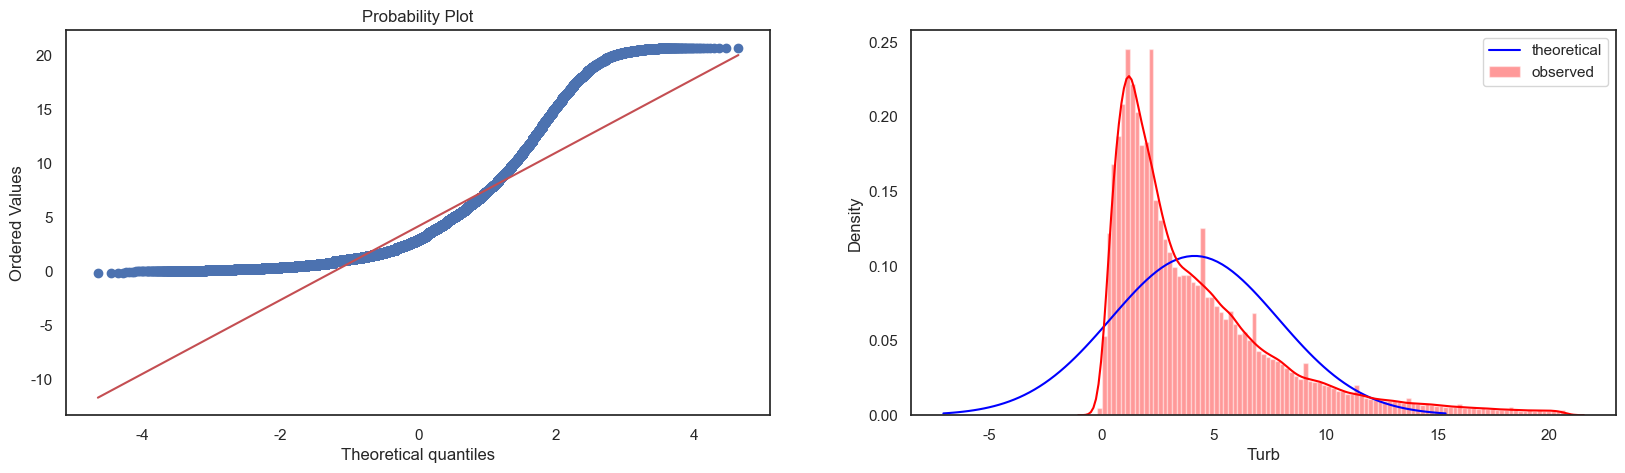

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


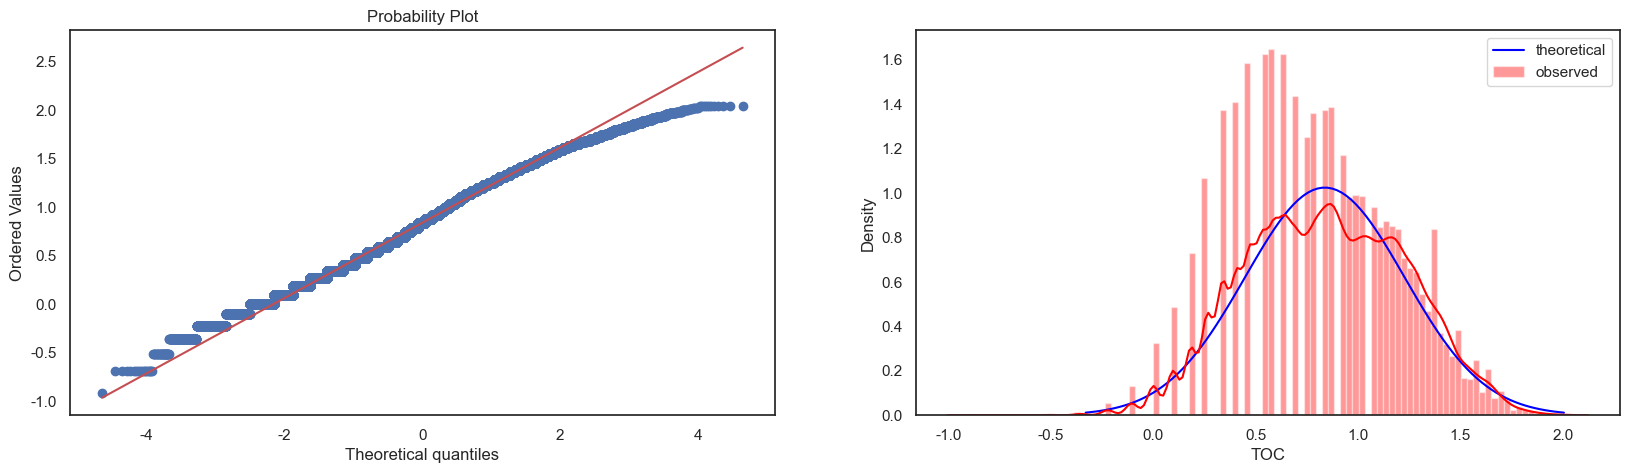

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


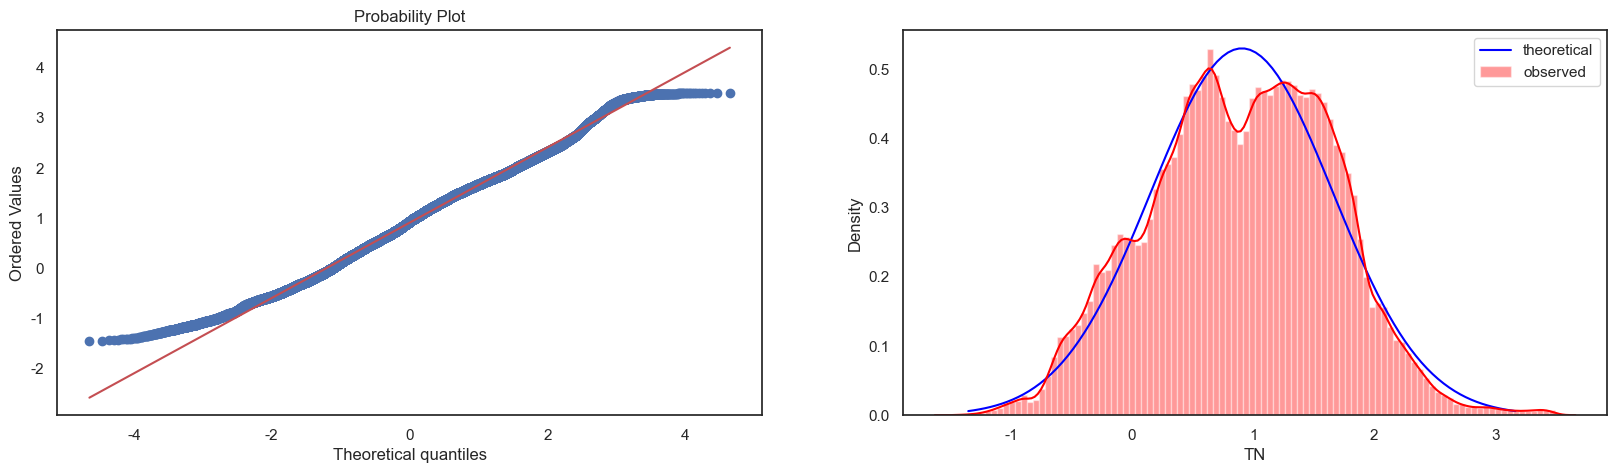

/var/folders/ks/k2ldwz8n0rdc_h2n4h_5_sp00000gn/T/ipykernel_33936/2985562593.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')


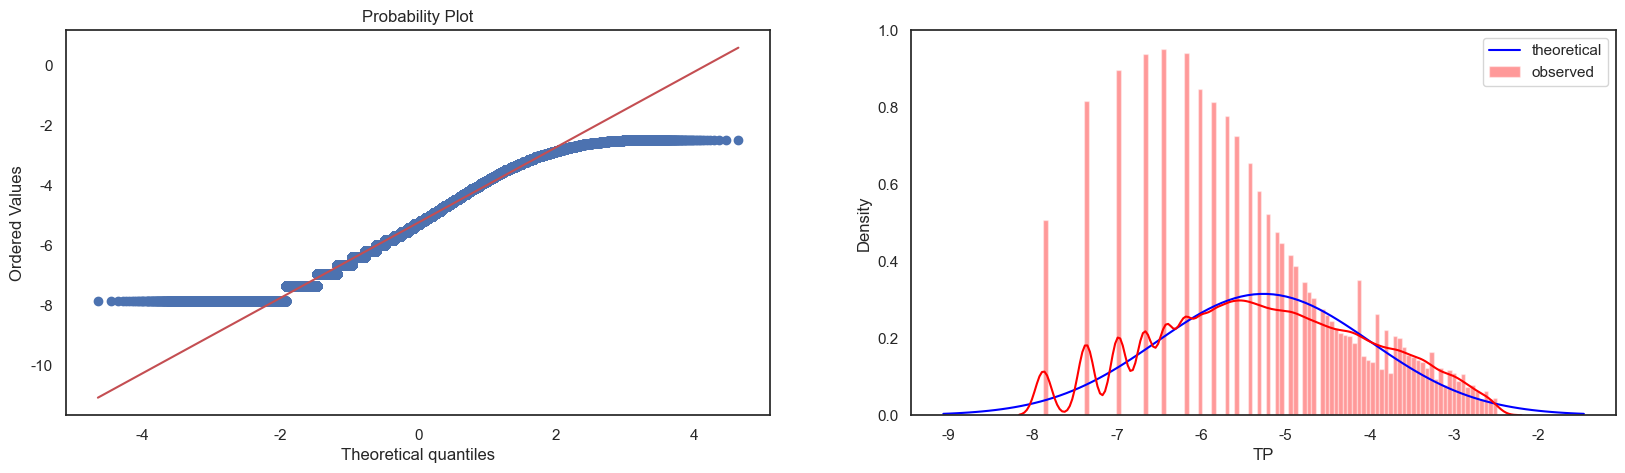

In [240]:
# # Box-Cox Transformation and Lambda Printing
# for k in df.columns:
#     if k != 'Temp' and k != 'Do':
#         df[k], lm = boxcox(df[k])
#         print(f"{k}: Lambda = {lm:.3f}")

from scipy.stats import boxcox

# Box-Cox Transformation and Lambda Printing
for k in df.columns:
    if k != 'Temp' and k != 'Do':
        # Check if all data in the column is positive
        if (df[k] > 0).all():
            df[k], lm = boxcox(df[k])
            print(f"{k}: Lambda = {lm:.3f}")
        else:
            print(f"Skipping {k} due to non-positive data.")
    else:
        print(f"Skipping {k} due to column exclusion.")
        
# Kolmogorov-Smirnov Test
for k in df.columns:
    test_stat, p_val = stats.kstest(df[k], 'norm')
    print(f"{k}: Test-statistics = {test_stat:.3f}, p-value = {p_val:.3f}, skewness = {df[k].skew():.3f}")

# D'Agostino and Pearson's Test
for k in df.columns:
    test_stat, p_val = stats.normaltest(df[k])
    print(f"{k}: Test-statistics = {test_stat:.3f}, p-value = {p_val:.3f}, skewness = {df[k].skew():.3f}")

# Probability Plot and Distribution Plot
for k in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    stats.probplot(df[k], dist=stats.norm, plot=ax1)

    mu = df[k].mean()
    variance = df[k].var()
    sigma = variance ** 0.5

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

    sns.distplot(df[k], bins=100, color="red", ax=ax2, label='observed')
    ax2.legend()

    plt.show()

## 6. Scaler

In [241]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler

from keras.models import Sequential
from keras.layers import Dense, PReLU, LeakyReLU, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import optimizers
import tensorflow as tf


# phương pháp lựa chọn feature, làm giảm số chiều đầu vào giúp cho việc training model
feature = ['Temp','pH','EC','Do','Turb']
label = ['TOC']
x_train, x_valid, y_train, y_valid = train_test_split(data[feature], data[label], test_size=0.2, random_state=1)

In [242]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

### 6.2 Deep learning model


In [243]:
#lrelu= lambda x: tf.keras.activations.relu(x, alpha=0.3)

Dratio=0.2

# 2. 모델 구성하기 (To configure a model)
model = Sequential()
model.add(Dense(256, input_dim=5, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(64, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(16, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(4, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(1))

# 3. 모델 학습과정 설정하기 (Setting up a model course)
adam = optimizers.Nadam(lr=0.0005)
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=adam, loss='mse', metrics=['mae'])

# 4. 모델 학습시키기 (To train a model)
hist = model.fit(x_train_scaled, y_train, epochs=500, batch_size=10000)

Epoch 1/500


/Users/thuanmaivan/anaconda3/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/thuanmaivan/anaconda3/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/thuanmaivan/anaconda3/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


36/36 [==============================] - 1s 13ms/step - loss: 5.5420 - mae: 2.0047
Epoch 2/500
36/36 [==============================] - 0s 13ms/step - loss: 2.6912 - mae: 1.2551
Epoch 3/500
36/36 [==============================] - 0s 13ms/step - loss: 2.1342 - mae: 1.1148
Epoch 4/500
36/36 [==============================] - 0s 14ms/step - loss: 1.8545 - mae: 1.0322
Epoch 5/500
36/36 [==============================] - 0s 14ms/step - loss: 1.6834 - mae: 0.9822
Epoch 6/500
36/36 [==============================] - 0s 14ms/step - loss: 1.6052 - mae: 0.9571
Epoch 7/500
36/36 [==============================] - 0s 14ms/step - loss: 1.5639 - mae: 0.9438
Epoch 8/500
36/36 [==============================] - 0s 14ms/step - loss: 1.5197 - mae: 0.9286
Epoch 9/500
36/36 [==============================] - 0s 14ms/step - loss: 1.4838 - mae: 0.9175
Epoch 10/500
36/36 [==============================] - 0s 14ms/step - loss: 1.4502 - mae: 0.9069
Epoch 11/500
36/36 [==============================] - 0s 13ms

In [244]:
# 5. 학습과정 살펴보기 (Looking at the course of study)
%matplotlib inline
import matplotlib.pyplot as plt

# 6. 모델 평가하기 (Evaluating the Model)
plt.plot(hist.history['loss'])
plt.ylim(0.0, 2)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='upper left')
plt.show()

loss = model.evaluate(x_valid_scaled, y_valid, batch_size=12)
print('loss : ' + str(loss))

7351/7351 [==============================] - 2s 275us/step - loss: 0.3546 - mae: 0.4295
loss : [0.35463622212409973, 0.42945823073387146]


In [245]:
##############################################################################################################
def adj_r2_score(y_true, y_pred, p=x_train_scaled.shape[1]):
    return 1-(1-r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - p - 1)

##############################################################################################################

from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

pred = model.predict(x_valid_scaled)
pred = pd.DataFrame(pred, columns = label)

#print("R2_Train: ", r2_score(y_train, model.predict(x_valid_scaled)))
print("R2_Test:  ", r2_score(y_valid, pred))
print("ad_R2_Test:  ", adj_r2_score(y_valid, pred))

2757/2757 [==============================] - 1s 233us/step
R2_Test:   0.7375415440128059
ad_R2_Test:   0.7375266657529032


In [246]:
import matplotlib.pyplot as plt

plt.scatter (pred, y_valid, color = 'blue')
plt.plot (y_valid, y_valid, color = 'red')
plt.xlabel('Estimated value')
plt.ylabel('True value')
plt.show()